# 1.1 인코더-디코더 프레임워크

1. RNN
    1. 단어 또는 문자와 같은 입력을 받아 네트워크를 통과시킨 후 은식상태라는 벡터를 출력, 동시에 출력된 정보를 피드백 루프로 보내 자기 자신에 다시 입력 -> 출력한 정보의 일부를 다음 스텝에 사용
    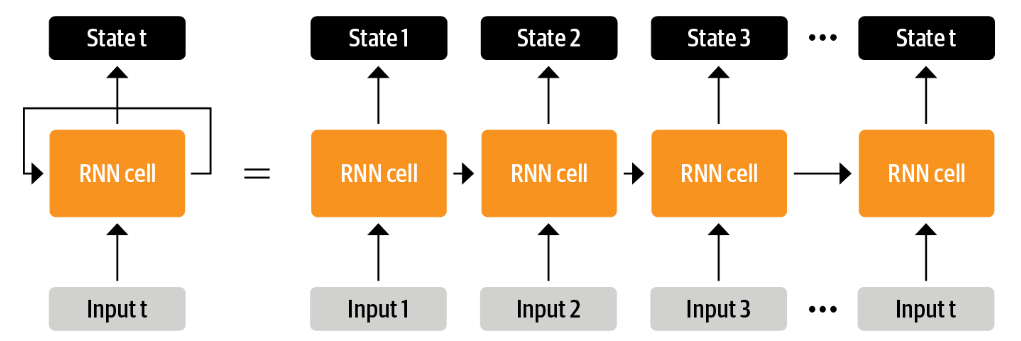
    2. 이런 종류의 작업을 'encoder-decoder' or 'sequence-to-sequence' 구조로 처리하며 입력과 출력이 임의의 길이를 가진 시퀀스일 때 잘 맞음, 인코더는 입력 시퀀스의 정보를 마지막 은닉 상태라고도 부르는 수치 표현으로 인코딩 후 이 상태가 디코더로 전달되어 출력 시퀀스가 생성
    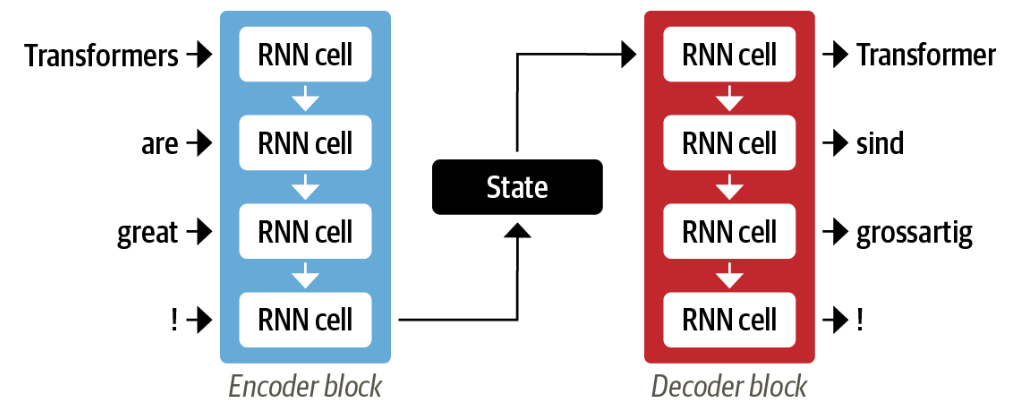
2. 인코더-디코더의 단점
    1. 디코더는 인코더의 마지막 은닉 상태만을 참조해 출력을 만들므로 정보 병목 현상이 나타날 수 있으며, 인코더의 마지막 은닉 상태에 전체 입력 시퀀스의 의미가 담겨야 하기에 시퀀스가 긴 경우 압축 과정에서 시작 부분의 정보 손실 가능성이 존재
3. 어텐션
    1. 인코더-디코더의 단점인 병목 현상을 해결
    2. 디코더가 인코더의 모든 은닉 상태에 접근해 병목 제거

# 1.2 어텐션 매커니즘    

1. 입력 시퀀스에서 은닉 상태를 만들지 않고 스텝마다 인코더에서 디코더가 참고할 은닉 상태를 출력
2. 하지만 모든 상태를 동시에 사용하려면 어떤 상태를 먼저 사용할지 우선순위를 정하는 메커니즘이 필요한데 여기서 어텐션 사용
3. 타임스텝마다 가장 많이 관련된 입력 토큰에 초점을 맞춤
4. But 순환 모델의 단점을 여전히 존재(순차 계산) -> 이를 해결한 게 셀프 어텐션(3장)

어텐션
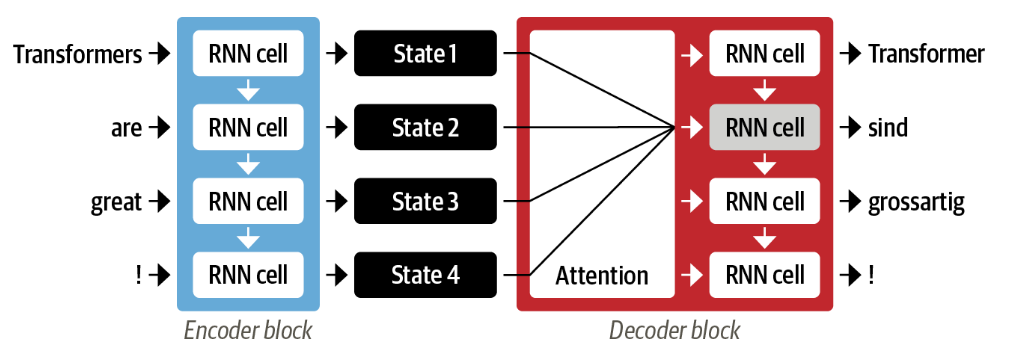
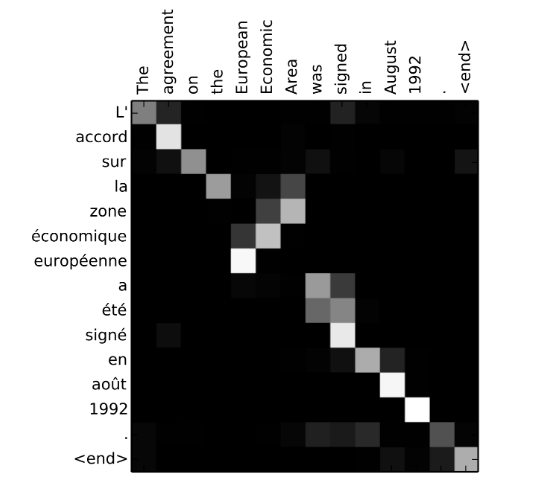

셀프 어텐션
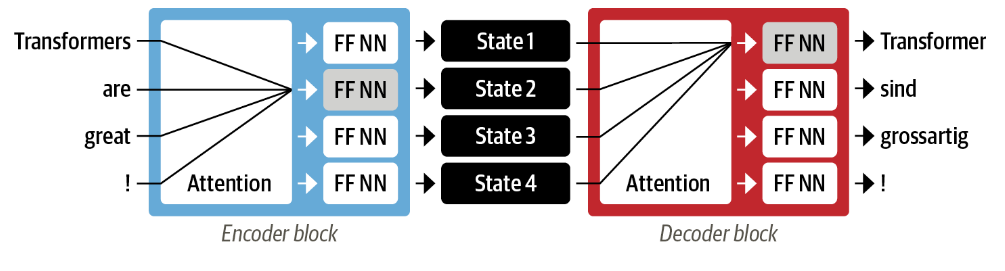

# 1.3 NLP의 전이 학습

1. 전통적인 지도 학습과 비교해 바디의 가중치를 이용해 새로운 모델을 만드는 전이 학습은 적은 양의 레이블 데이터로 훨씬 높은 품질의 모델을 만듦
    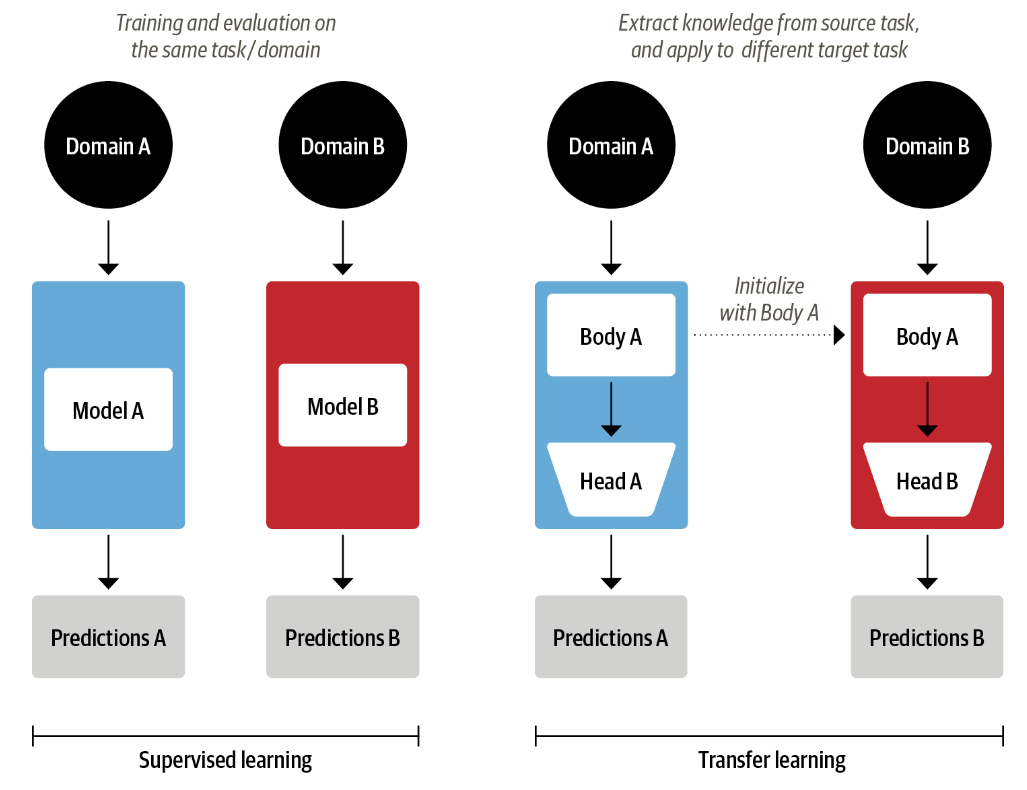
2.하지만 NLP에서 전이 학습과 유사한 사전 훈련 과정을 특정하지 못했고, 마침내 나온 게 ULMFiT
3. ULMFit의 단계
    1. 사전 훈련(Language Modeling), 레이블링된 데이터가 필요하지 않으며 위키피디아 같은 소스에 있는 데이터 활용
    2. 도메인 적응, 언어 모델을 대규모 말뭉치에서 사전 훈련한 후, 다음 단계로 도메인 내 말뭉치에 적응
    3. 미세 튜닝
    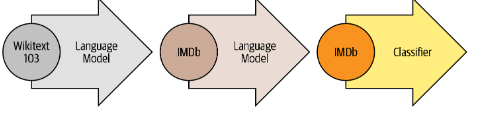
4. GPT
    1. 트랜스포머 아키텍처의 디코더 부분만 사용하고 ULMFiT 같은 언어 모델링 방법 사용
5. BERT
    1. 트랜스포머 아키텍처의 인코더 부분을 사용하고 masked language modeling 사용

# 1.4 허깅페이스 트랜스포머스

1. 새로운 머신러닝 아키텍처를 새로운 작업에 적용하는 단계
    1. 모델 아키텍처를 코드로 구현, 전형적으로 파이토치 or 텐서플로 사용
    2. 가능하다면 서버로부터 사전 훈련된 가중치 로드
    3. 입력 전처리하고 모델에 전달 후 해당 작업에 맞는 사후 처리 수행
    4. 데이터로더를 구현하고 모델 훈련을 위해 손실 함수와 옵티마이저 정의
    
2. 이 과정은 굉장히 오래 걸리는데 트랜스포머스가 표준화된 인터페이스를 제공하며 새로운 문제에 모델을 적용하는 코드와 도구도 제공하며 해결

# 1.5 트랜스포머 애플리케이션 둘러보기

온라인 주문에 대한 리뷰가 긍정인지 부정인지 확인 -> 감성 분석(sentiment analysis)

### 1.5.1 텍스트 분류

In [1]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [2]:
from transformers import pipeline

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


감성 분석 작업에서 파이프라인은 positive와 negative 레이블 중 하나를 반환, 출력되지 않은 레이블의 점수는 1-score로 계산하면 되기 때문

### 1.5.2 개체명 인식

In [4]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590255,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498350,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


모델 예측에 따라 단어를 그룹화하기 위해 aggregation_strategy 매개변수 사용(ex. Optimus Prime은 두 단어이지만 하나의 카테고리에 할당),
점수는 모델이 개체명을 얼마나 확신하는지를 나타냄

### 1.5.3 질문 답변

In [5]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


답이 위치한 문자 인덱스에 해당하는 start와 end 정수도 반환, 답변을 텍스트에서 직접 추출하기 때문에 추출적 질문 답변(extractive question answering)이라 함

### 1.5.4 요약

In [6]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=60, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I hope you can understand


### 1.5.5 번역

In [7]:
translator = pipeline("translation_en_to_de", model = "Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

C:\Users\jiyou\anaconda3\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jiyou\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


C:\Users\jiyou\anaconda3\lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von Ihnen zu hören. Aufrichtig, Bumblebee.


### 1.5.6 텍스트 생성

In [8]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt,max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\jiyou\anaconda3\lib\site-packages\transformers\generation\utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. I hope you will have your order filled, and you may return the order again within 2 business days. Otherwise, we will not be able to service you and we hope we will have something to explain. Thank you for your service.


# 1.6 허깅페이스 생태계

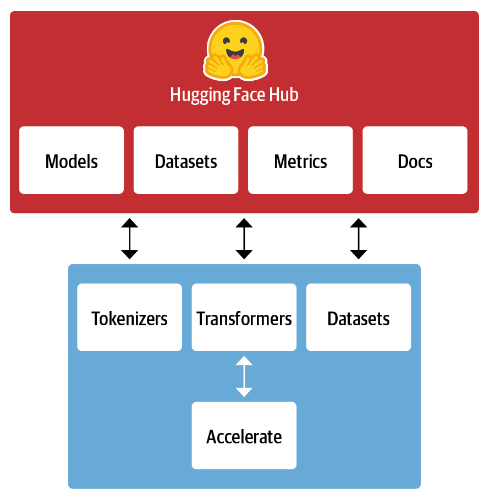

# 1.7 트랜스포머의 주요 도전 과제

1. 언어
   1. 주로 영어 데이터셋만 존재
2. 데이터 가용성
    1. 사람이 작업을 수행하는 데 필요한 양보다 데이터가 많이 필요함
3. 긴 문서 처리
    1. 비용이 많이 듦
4. 불투명성
    1. 모델이 그렇게 예측한 이유를 설명하기 어렵거나 불가
5. 편향
    1. 주로 인터넷의 텍스트 데이터를 사용해 사전 훈련을 하므로 데이터의 편향이 모델에 고스란히 전이됨